# Defining a Caner Dependency Map- Correlated Dependency Profiles
***https://depmap.org/portal/data_page/?release=DepMap+Public+24Q4&file=Model.csv&tab=allData***






# (a) Download data
***This first kind of genetic interaction is based on correlation between the CRISPR knockdown
profiles of two genes. (a) These values are the effect a gene has on a cell-line’s growth, accounting for copy number variation. Files from DepMap Public 24Q4 corresponding to the effects a gene has on a cell-line’s growth in CRISPR knockout and RNAi screens, respectively.***

# (b) Comparison of the 2 data modalities on CRISPRGeneEffect & D2.combines_gene_dep_scores

***As suggested by Tsherniak et. Al., we’d like an apples-to-apples comparison of the 2 data
modalities, and for that we’d like the dataframes to be arranged the same way and for the
gene sets to be the same. Transpose the RNAi dataframe such that the columns are genes,
and the rows are cell lines. Get the list of genes that the two dataframes share and then
filter both dataframes with that list.***

        -Step1:Load two dataframe
        -Step2: Transpose the RNAi dataframe (D2), columns: genes, rows: cell lines
        -Step3: Get the list of genes that two dataframes share
        -Step4: Filter both dataframes with that list

In [1]:
import numpy as np
import pandas as pd

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load RNAi, col: genes, row:cell line
# Step 1 load CRISPR and RNAi
path= r'D:/BNFO286/CRISPRGeneEffect.csv'
crispr= pd.read_csv(path, sep=',', index_col=0)
rnai=pd.read_csv(r'D:/BNFO286/D2_combined_gene_dep_scores.csv', index_col=0)
rnai.head()

,127399_SOFT_TISSUE,1321N1_CENTRAL_NERVOUS_SYSTEM,143B_BONE,184A1_BREAST,184B5_BREAST,22RV1_PROSTATE,2313287_STOMACH,600MPE_BREAST,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,...,WM88_SKIN,WM983B_SKIN,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YKG1_CENTRAL_NERVOUS_SYSTEM,YMB1_BREAST,ZR751_BREAST,ZR7530_BREAST,ZR75B_BREAST
A1BG (1),NaN,NaN,0.146042,-0.190388,0.907063,-0.019331,-0.016734,0.091580,0.035023,-0.122046,...,-0.088267,0.002171,NaN,0.120294,0.012540,0.111530,NaN,-0.079313,-0.141559,0.214268
NAT2 (10),NaN,NaN,0.102854,0.384106,0.403192,0.001925,-0.153933,-0.317969,0.012341,-0.205077,...,-0.003747,-0.321445,NaN,-0.003256,-0.220472,0.073460,NaN,-0.130921,0.127358,-0.405974
ADA (100),NaN,NaN,0.168839,-0.120700,0.004394,-0.188700,-0.060818,-0.755058,0.129770,0.076273,...,-0.014085,0.039679,NaN,0.076521,0.106995,0.227977,NaN,-0.134479,0.083506,-0.404291
CDH2 (1000),-0.194962,-0.028171,0.063047,-0.237251,-0.017059,-0.103047,-0.049460,0.130107,0.146864,-0.126198,...,-0.073435,-0.140041,-0.154436,-0.040308,-0.078707,0.000769,-0.139126,0.047022,-0.097644,-0.062622
AKT3 (10000),-0.256108,0.100751,-0.008077,0.060267,-0.094749,-0.066591,0.166029,0.149969,-0.053022,0.092426,...,0.028714,-0.054628,0.450581,0.002932,0.129679,-0.072564,0.017161,0.123615,0.046846,0.125711


In [3]:
# step 2: Transpose rnai, Column: gene rows: cell-line
rnai_T=rnai.T
rnai_T

,A1BG (1),NAT2 (10),ADA (100),CDH2 (1000),AKT3 (10000),MED6 (10001),NR2E3 (10002),NAALAD2 (10003),DUXB (100033411),PDZK1P1 (100034743),...,RCE1 (9986),HNRNPDL (9987),DMTF1 (9988),PPP4R1 (9989),CDH1 (999),SLC12A6 (9990),KCNE2 (9992),DGCR2 (9993),CASP8AP2 (9994),SCO2 (9997)
127399_SOFT_TISSUE,NaN,NaN,NaN,-0.194962,-0.256108,-0.174220,-0.140052,NaN,NaN,NaN,...,-0.201644,-0.363670,0.184260,-0.115616,-0.125958,NaN,0.088853,NaN,-0.843295,NaN
1321N1_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,NaN,-0.028171,0.100751,-0.456124,-0.174618,NaN,NaN,NaN,...,0.074889,0.152158,0.036011,0.117300,0.101725,NaN,-0.110628,NaN,-0.307031,NaN
143B_BONE,0.146042,0.102854,0.168839,0.063047,-0.008077,-0.214376,-0.153619,0.133830,0.138673,0.030345,...,0.006735,-0.033385,0.197651,-0.016372,0.077486,0.106165,0.057286,0.025596,-0.413669,0.122669
184A1_BREAST,-0.190388,0.384106,-0.120700,-0.237251,0.060267,-0.338946,-0.057551,0.134511,NaN,0.144463,...,0.209009,-0.156839,-0.155837,-0.001141,NaN,0.227968,0.028095,-0.080611,-1.849696,-0.078856
184B5_BREAST,0.907063,0.403192,0.004394,-0.017059,-0.094749,-0.328074,-0.089573,0.362029,NaN,-0.098161,...,-0.137465,-1.037848,-0.261262,-0.228016,NaN,0.088744,0.159467,0.014071,-0.414154,0.032661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YKG1_CENTRAL_NERVOUS_SYSTEM,0.111530,0.073460,0.227977,0.000769,-0.072564,-0.175593,-0.155250,0.105052,0.143781,0.357053,...,-0.079333,-0.358065,-0.090982,0.168945,-0.173036,0.141616,0.109206,0.153414,-0.046700,0.075238
YMB1_BREAST,NaN,NaN,NaN,-0.139126,0.017161,-0.226356,-0.445319,NaN,NaN,NaN,...,-0.050825,0.286697,0.134608,-0.166845,0.065173,NaN,-0.048763,NaN,-0.865486,NaN
ZR751_BREAST,-0.079313,-0.130921,-0.134479,0.047022,0.123615,-0.311682,-0.211145,-0.014285,0.074681,-0.053025,...,-0.143304,-0.078062,-0.022528,0.021830,0.308641,0.100142,0.128882,0.159781,-1.039110,0.100361
ZR7530_BREAST,-0.141559,0.127358,0.083506,-0.097644,0.046846,-0.355300,-0.095010,0.049151,0.129006,0.038661,...,-0.146587,-0.050230,0.127782,-0.031292,0.035794,0.160643,-0.179656,0.286456,-0.301415,-0.117268


In [4]:
#step3: Get list
shared_genes = list(set(crispr.columns).intersection(set(rnai_T.columns)))
print(len(shared_genes))

15205


In [5]:
#step4; Filter
#rnai_filtered=crispr[shared_genes]
crispr_filtered=crispr[shared_genes]
print("CRISPR with filter:\n", crispr_filtered.head())
rnai_filtered=rnai_T[shared_genes]
print("RNAi with filter:\n", rnai_filtered.head())

CRISPR with filter:
             TOGARAM1 (23116)  PRDX3 (10935)  MMP13 (4322)  TAS1R1 (80835)  \
ACH-000001         -0.014088      -0.334392      0.011800        0.111213   
ACH-000004         -0.126009      -0.210027     -0.027849        0.068654   
ACH-000005         -0.121564      -0.181849     -0.041658        0.244565   
ACH-000007         -0.120008      -0.153787      0.007697       -0.091139   
ACH-000009          0.055858      -0.172150     -0.028699       -0.044474   

            GHRH (2691)  GCM1 (8521)  SLC23A1 (9963)  EPHX4 (253152)  \
ACH-000001    -0.034492     0.038272        0.072296       -0.095318   
ACH-000004     0.015717     0.144866        0.262576       -0.165550   
ACH-000005     0.054971    -0.102206        0.103311       -0.184266   
ACH-000007     0.065199    -0.113727        0.094462       -0.206768   
ACH-000009     0.054067     0.194828       -0.033350       -0.089354   

            KPTN (11133)  SAPCD2 (89958)  ...  SELE (6401)  OSBPL9 (114883)  \
ACH-

# (c) Match Row
***We’d also like the dataframes to share the same set of cell lines, the only problem is that
they have different naming schemes! The Model.csv should have two columns that make a
mapping from one name to the next (those being ‘ModelID’ and ‘StrippedCellLineName’).
Map the cell lines names from CRISPR to match those from RNAi and then filter the set
of consensus cell lines like we did for genes in b) Remove the
oncotree descriptors appended to the names in the RNAi dataframe). We should now have
two dataframes of equal dimensions***

    - Step 1: Remove the oncotree descriptors in the RNAi dataframe
    - Step 2: Map the cell lines names from CRISPR to match those from RNAi
    - Step 3: Filter the set of consensus cell lines

In [6]:
# step 1 remove the oncotree descriptors from rows' names in the RNAi dataframe (ex. remove _SOFT_TISSUE from 127399_SOFT_TISSUE)
# Reset index to bring cell line names into a column
rnai_filtered = rnai_filtered.reset_index()
# Remove OncoTree descriptors
rnai_filtered['index'] = rnai_filtered['index'].apply(lambda x: x.split('_')[0])
# Set the cleaned cell line names back as the index
rnai_filtered = rnai_filtered.set_index('index')
print("RNAi with filter and remove oncotree descriptors:\n", rnai_filtered)

# step 2 
model= pd.read_csv(r'D:/BNFO286/model.csv')
print("Model:\n", model.head())
print("CRISPR with filter:\n", crispr_filtered) #without index
crispr_prepare_for_merge = crispr_filtered.reset_index() #add index
print("Add index for CRISPR:\n", crispr_prepare_for_merge)

crispr_replace_name = crispr_prepare_for_merge.merge(model[['ModelID', 'StrippedCellLineName']], left_on='index', right_on='ModelID', how='left')

# Replace the CRISPR row names with `StrippedCellLineName`
crispr_replace_name.set_index('StrippedCellLineName', inplace=True)  # Set the new row names
crispr_replace_name.drop(['index', 'ModelID'], axis=1, inplace=True)  # Drop unnecessary columns
print("Match CRISPR name with RNAi cell line names:\n", crispr_replace_name)

RNAi with filter and remove oncotree descriptors:
         TOGARAM1 (23116)  PRDX3 (10935)  MMP13 (4322)  TAS1R1 (80835)  \
index                                                                   
127399               NaN      -0.169964           NaN       -0.397812   
1321N1               NaN      -0.000924           NaN       -0.346515   
143B           -0.123058       0.000653      0.139569       -0.147098   
184A1           0.071114      -0.176267      0.264240       -0.442237   
184B5           0.544158      -0.171349      0.379211       -0.207876   
...                  ...            ...           ...             ...   
YKG1                 NaN      -0.018823     -0.062773       -0.132781   
YMB1                 NaN       0.184991           NaN       -0.134166   
ZR751          -0.143279       0.033871     -0.131613       -0.255269   
ZR7530               NaN      -0.153860      0.000139       -0.152644   
ZR75B           0.414032      -0.191775      0.269491        0.008769   


In [7]:
#Find the same cell line names
shared_cell_lines = list(set(rnai_filtered.index).intersection(set(crispr_replace_name.index)))
print(shared_cell_lines)

crispr_cell_filtered = crispr_replace_name.loc[shared_cell_lines]
print("CRISPR_cell_lines with filter:\n", crispr_cell_filtered)
rnai_cell_filtered = rnai_filtered.loc[shared_cell_lines]
print("RNAi_cell_lines with filter:\n", rnai_cell_filtered)

['D425', 'HEC265', 'HCC44', 'WM115', 'CAL120', 'COV362', 'HCC1359', 'KPNYN', 'HEC251', 'NCIH522', 'SKMM2', 'C32', 'REH', 'OE33', 'JHH6', 'RMGI', 'SF268', 'LN428', 'COLO201', 'SUPT1', 'HCT15', 'CAMA1', 'LN229', 'KYSE70', '8505C', 'RS411', 'SU8686', 'HCC2450', 'DU4475', 'SUM159PT', 'OV90', 'TUHR10TKB', 'GI1', 'SUM52PE', 'A172', 'SKMEL30', 'KYSE150', 'EN', 'NCIH322', 'KNS62', 'NCIH1666', 'CAOV4', 'CAL33', 'RPMI7951', 'KMS34', 'SNU410', 'JL1', 'NIHOVCAR3', 'TE10', 'MOLM13', 'ES2', 'MDAMB361', 'PATU8988T', 'SH4', 'NCIH1437', 'MDAMB436', 'LOVO', 'NCIH2030', 'NCIH2126', 'HUPT3', 'NCIH209', 'OCIAML2', 'HUH7', 'SUM1315MO2', 'A2058', 'T47D', 'KELLY', 'DBTRG05MG', 'HOP62', 'OAW42', 'UACC893', 'FU97', 'COLO320', 'SNU5', 'TTC549', 'BHT101', 'SF126', 'SKNDZ', 'MDST8', 'MEL285', 'NCIH1648', 'HT1080', 'PANC0813', 'HEYA8', 'SKNMC', 'SNU719', 'PK1', 'KM12', 'SUM149PT', 'HCT116', 'COV504', 'HT55', 'MIAPACA2', 'NCIH1568', 'CHAGOK1', 'BFTC909', 'COLO800', 'DU145', 'HS852T', 'SNU1076', 'KP1N', 'SW403', 'MON

# d
Let’s now look at how closely correlated these genes in question are. Calculate the gene- gene correlation dataframe using the corr method for both dataframes. Note: this part may take a long time as the correlations matrices are large. Make sure you are getting
gene-gene correlation rather than cell-line-cell-line correlations. You will need to drop the cell line columns from the dataframes using the drop() method.

    - Step: calculate correlation between gene & gene for both two dataframe

In [8]:
crispr_cell_filtered
#crispr_cell_filtered.drop('StrippedCellLineName', axis=1, inplace=True) #don't need to drop StrippedCellLineName cuz it's
# an index rather than column
crispr_gene_correlation = crispr_cell_filtered.corr()
rnai_gene_correlation = rnai_cell_filtered.corr()

print("CRISPR gene-gene correlation:\n", crispr_gene_correlation)
print("RNAi gene-gene correlation:\n", rnai_gene_correlation)

CRISPR gene-gene correlation:
                   TOGARAM1 (23116)  PRDX3 (10935)  MMP13 (4322)  \
TOGARAM1 (23116)          1.000000      -0.006475      0.064897   
PRDX3 (10935)            -0.006475       1.000000     -0.021962   
MMP13 (4322)              0.064897      -0.021962      1.000000   
TAS1R1 (80835)           -0.070823       0.086955     -0.023055   
GHRH (2691)               0.041068       0.063609      0.035451   
...                            ...            ...           ...   
FANCL (55120)            -0.001271       0.029916      0.009415   
MPO (4353)               -0.190883       0.031891      0.022192   
RAP1B (5908)              0.009196      -0.048812      0.101429   
JCHAIN (3512)            -0.012448      -0.008703      0.031537   
NFKBIZ (64332)            0.211064       0.020568     -0.039035   

                  TAS1R1 (80835)  GHRH (2691)  GCM1 (8521)  SLC23A1 (9963)  \
TOGARAM1 (23116)       -0.070823     0.041068    -0.132580       -0.203912   
PRDX3 (1

# e
calculate the mean and standard deviation over all elements of this dataframe (ignoring missing values). You can do this by using the numpy.nanmean and numpy.nanstd functions. 
Standardize both correlation dataframes by mean-centering (subtracting the mean from every element) and dividing every element by the standard deviation using the values we just computed. This converts every element into a Z-score. Binarize these dataframes by thresholding Z using the same criteria as the paper (Z ≥ 3).
Note that you have now created two adjacency matrices

    - Step1: Calculate mean & SD of the dataframe (numpy.nanmean & numpy.nanstd)
    - Step2: Standardize both correlation dataframes by mean-centering (subtracting the mean from every element, and devide by std)
    - Step3: Z-score (Z>=3)

In [9]:
crispr_mean = np.nanmean(crispr_gene_correlation)
crispr_std = np.nanstd(crispr_gene_correlation)
z_score_crispr = (crispr_gene_correlation-crispr_mean)/crispr_std

rnai_mean = np.nanmean(rnai_gene_correlation)
rnai_std = np.nanstd(rnai_gene_correlation)
z_score_rnai = (rnai_gene_correlation-rnai_mean)/rnai_std

print("Standardized Z-score of CRISPR:\n", z_score_crispr)
print("Standardized Z-score of RNAi:\n", z_score_rnai)

Standardized Z-score of CRISPR:
                   TOGARAM1 (23116)  PRDX3 (10935)  MMP13 (4322)  \
TOGARAM1 (23116)         13.175208      -0.102994      0.838602   
PRDX3 (10935)            -0.102994      13.175208     -0.307314   
MMP13 (4322)              0.838602      -0.307314     13.175208   
TAS1R1 (80835)           -0.951932       1.129605     -0.321734   
GHRH (2691)               0.524230       0.821603      0.450123   
...                            ...            ...           ...   
FANCL (55120)            -0.034337       0.377095      0.106629   
MPO (4353)               -2.535858       0.403159      0.275196   
RAP1B (5908)              0.103749      -0.661547      1.320561   
JCHAIN (3512)            -0.181804      -0.132387      0.398492   
NFKBIZ (64332)            2.766944       0.253775     -0.532561   

                  TAS1R1 (80835)  GHRH (2691)  GCM1 (8521)  SLC23A1 (9963)  \
TOGARAM1 (23116)       -0.951932     0.524230    -1.766676       -2.707738   
PRDX3 

In [10]:
binarized_crispr = (z_score_crispr >= 3).astype(int)
binarized_rnai = (z_score_rnai >= 3).astype(int)

print("Binarized Adjacency Matrix (CRISPR):\n", binarized_crispr)
print("Binarized Adjacency Matrix (RNAi):\n", binarized_rnai)

Binarized Adjacency Matrix (CRISPR):
                   TOGARAM1 (23116)  PRDX3 (10935)  MMP13 (4322)  \
TOGARAM1 (23116)                 1              0             0   
PRDX3 (10935)                    0              1             0   
MMP13 (4322)                     0              0             1   
TAS1R1 (80835)                   0              0             0   
GHRH (2691)                      0              0             0   
...                            ...            ...           ...   
FANCL (55120)                    0              0             0   
MPO (4353)                       0              0             0   
RAP1B (5908)                     0              0             0   
JCHAIN (3512)                    0              0             0   
NFKBIZ (64332)                   0              0             0   

                  TAS1R1 (80835)  GHRH (2691)  GCM1 (8521)  SLC23A1 (9963)  \
TOGARAM1 (23116)               0            0            0               0   
P

# f
***We’re now ready to compare dependencies! Select the rows (or columns since the matrices are symmetric) that correspond to CHEK1 in these two dataframes. Look at the genes where our dependencies disagree (you can do this using the .loc method). Discuss potential reasons these strategies gave different results. What’s the name of the major cancer biomarker where the two approaches disagree?***

         - Step 1: Select the row contain CHEK1 in both two dataframe
         - Step 2: Use the .loc to look at the genes where our dependencies disagree
         - Step 3: Why different result? What's the name of the major cancer biomarker where the two approaches disagree?


In [18]:
crispr_chek1 = binarized_crispr.loc["CHEK1 (1111)"]
rnai_chek1 = binarized_rnai.loc["CHEK1 (1111)"]
dependency_diff = crispr_chek1 - rnai_chek1  
largest_disagreements = dependency_diff.abs().sort_values(ascending=False).head(5)  
print("Genes where our dependencies disagree:\n", crispr_chek1)
print("Major cancer biomarker where the two approaches disagree:\n", largest_disagreements)
print(len(crispr_chek1))

Genes where our dependencies disagree:
 TOGARAM1 (23116)    0
PRDX3 (10935)       0
MMP13 (4322)        0
TAS1R1 (80835)      0
GHRH (2691)         0
                   ..
FANCL (55120)       0
MPO (4353)          0
RAP1B (5908)        0
JCHAIN (3512)       0
NFKBIZ (64332)      0
Name: CHEK1 (1111), Length: 15205, dtype: int32
Major cancer biomarker where the two approaches disagree:
 PDCD7 (10081)     1
TSG101 (7251)     1
NOL11 (25926)     1
ANAPC4 (29945)    1
BRCA1 (672)       1
Name: CHEK1 (1111), dtype: int32
15205


# g 
***Let us now use the consensus of these dependencies (i.e. only consider a gene dependent when both RNAi and CRISPR screens detect it). Draw the subnetwork that consists of only these genetic interactions using networkx with CHEK1 as the hub (ego graph in networkx will help you out).***

    - Step1: Find the dependencies that RNAi and CRISPR are 1
    - Step2: Draw subnetwork of these interactions with CHEK1 as the hub (ego graph in networkx)
    - Step3; Are those network make sense?

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Find consensus dependencies (where both are 1)
consensus = (binarized_crispr.loc["CHEK1 (1111)"] & binarized_rnai.loc["CHEK1 (1111)"])
consensus_genes = consensus[consensus == 1].index

print("Genes dependent in both CRISPR and RNAi:", consensus_genes)

Genes dependent in both CRISPR and RNAi: Index(['TIMELESS (8914)', 'POLE (5426)', 'CHEK1 (1111)', 'WEE1 (7465)',
       'RRM2 (6241)', 'RRM1 (6240)'],
      dtype='object')


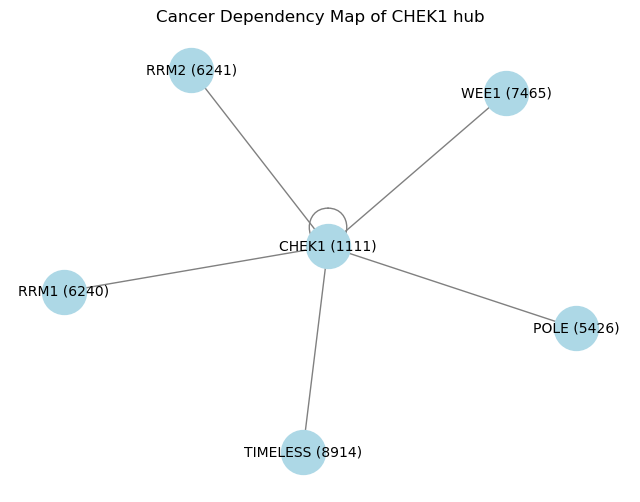

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()

# Add CHEK1 as the hub
G.add_node("CHEK1 (1111)")

# Add edges to consensus genes
for gene in consensus_genes:
    G.add_node(gene)
    G.add_edge("CHEK1 (1111)", gene)

# Fix: Explicitly create an axis before drawing
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the network
nx.draw(
    G, 
    with_labels=True, 
    node_size=1000, 
    node_color="lightblue", 
    font_size=10, 
    edge_color="gray", 
    ax=ax  # Explicitly pass the axis
)

plt.title("Cancer Dependency Map of CHEK1 hub")
plt.show()
